In [275]:
import json
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [199]:
df = pd.read_csv('kc_house_data.csv')


In [17]:
# del df['waterfront']

In [18]:
# del df['date']

In [20]:
# del df['yr_renovated']

In [22]:
# del df['view']

In [24]:
# del df['lat']

In [26]:
# del df['long']

In [39]:
# del df['zipcode']

In [41]:
# del df['id']

In [8]:
# df.fillna(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [200]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [247]:
import statsmodels.api as sm
X = df["price"]
y = df["date"]
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   date   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.555
Method:                 Least Squares   F-statistic:                          2.692e+04
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        15:27:51   Log-Likelihood:                         -64761.
No. Observations:               21597   AIC:                                  1.295e+05
Df Residuals:                   21596   BIC:                                  1.295e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price       8.294e-06   5.05e-08    164.084      0.000     8.2e-06    8.39e-06
==============================================================================
Omnibus:                     6712.822   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52249.606
Skew:                          -1.280   Prob(JB):                         0.00
Kurtosis:                      10.177   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
df = df.drop(['id', 'lat', 'long', 'yr_renovated', 'sqft_basement'], axis=1)

In [202]:
df = df.fillna(0)

In [203]:
df['date'] = pd.to_datetime(df['date'])

In [204]:
df['date'] = [i.month for i in df['date']]

In [228]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,yrs_standing
0,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,1340,5650,60
1,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,1690,7639,64
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,2720,8062,82
3,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,1360,5000,50
4,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,1800,7503,28
5,5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,4760,101930,14
6,6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,98003,2238,6819,20
7,1,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,1963,98198,1650,9711,52
8,4,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,1960,98146,1780,8113,55
9,3,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,2003,98038,2390,7570,12


In [242]:
df_pred = df.iloc[:,0:17]
df_pred.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,yrs_standing
0,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,1340,5650,60
1,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,1690,7639,64
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,2720,8062,82
3,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,1360,5000,50
4,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,1800,7503,28


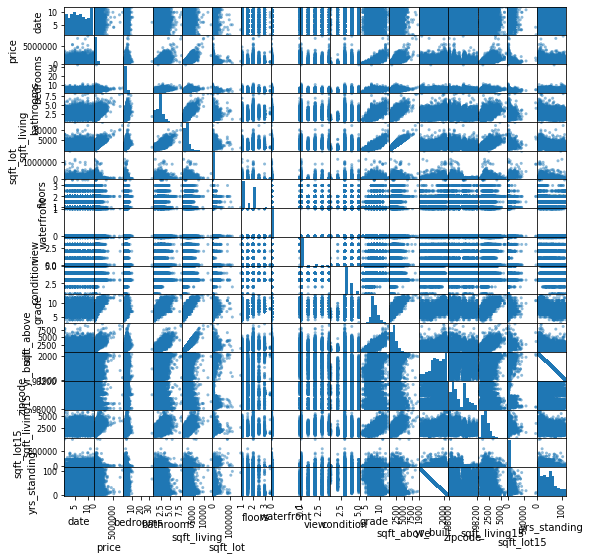

In [243]:
pd.plotting.scatter_matrix(df_pred,figsize  = [9, 9]);
plt.show()

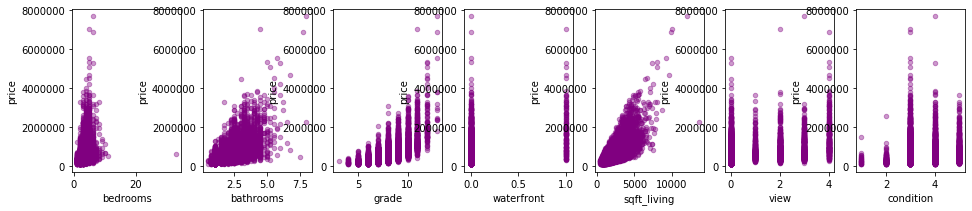

In [274]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'grade', 'waterfront', 'sqft_living', 'view', 'condition'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='purple')

In [207]:
df[['waterfront']].nunique()

waterfront    2
dtype: int64

In [208]:
yr_built = list(df['yr_built'])


In [209]:
yr_dif_built = []
for i in yr_built:
    x = 2015 - i
    yr_dif_built.append(x)

In [210]:
m = np.array(yr_dif_built)
yr_dff_built = pd.DataFrame(m)


In [211]:
df['yrs_standing'] = yr_dff_built

In [276]:
y = df[["price"]]
X = df

scale = StandardScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

In [66]:
X = X.fillna(0)

In [294]:


# Perform t`est train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [295]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[[ 0.00000000e+00 -3.85191600e+04  5.13407070e+04  1.59642375e+02
  -3.48576018e-02  1.88400463e+04  5.84472860e+05  1.22727997e+05
   4.80770372e+04 -2.60723548e+01  3.71325298e+03  2.37495151e+04
   9.72951164e-01  2.32886157e+01 -5.59662753e-01]]
Unpenalized Linear Regression Intercept:[1528023.20564299]


In [296]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Lasso Regression Coefficients are:[ 0.00000000e+00 -3.85185316e+04  5.13387958e+04  1.59643508e+02
 -3.48609226e-02  1.88385727e+04  5.84398203e+05  1.22727257e+05
  4.80797464e+04 -2.60685126e+01  3.71323168e+03  2.37472750e+04
  9.74183886e-01  2.32882993e+01 -5.59662294e-01]
Lasso Linear Regression Intercept:[1527659.31096605]


In [297]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

Ridge Regression Coefficients are:[[ 0.00000000e+00 -3.85307004e+04  5.13347846e+04  1.59661437e+02
  -3.49648084e-02  1.88391399e+04  5.81662122e+05  1.22713013e+05
   4.82035420e+04 -2.61151979e+01  3.71319689e+03  2.37528737e+04
   9.88779348e-01  2.32725156e+01 -5.59542397e-01]]
Ridge Linear Regression Intercept:[1532347.55018826]


In [300]:
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(16197,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test),(5400,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [301]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model price    7.715449e+14
dtype: float64
Test Error Ridge Model price    2.373509e+14
dtype: float64


Train Error Lasso Model price    7.715441e+14
dtype: float64
Test Error Lasso Model price    2.373294e+14
dtype: float64


Train Error Unpenalized Linear Model price    7.715441e+14
dtype: float64
Test Error Unpenalized Linear Model price    2.373289e+14
dtype: float64


In [302]:




housing_predictors = df.iloc[:,:15]
corr = housing_predictors.corr()



In [303]:
housing_predictors.iloc[:,:15]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15
0,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,1340
1,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,1690
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,2720
3,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,1360
4,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,1800
5,5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,4760
6,6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,98003,2238
7,1,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,1963,98198,1650
8,4,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,1960,98146,1780
9,3,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,2003,98038,2390


In [304]:
corr

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15
date,1.000000,-0.009928,-0.001046,0.007543,0.012112,-0.002591,0.014245,0.008199,-0.005161,0.022388,0.008989,0.010153,-0.006235,-0.000143,0.002513
price,-0.009928,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,-0.053402,0.585241
bedrooms,-0.001046,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,-0.154092,0.393406
bathrooms,0.007543,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.569884
sqft_living,0.012112,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.756402
sqft_lot,-0.002591,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,-0.129586,0.144763
floors,0.014245,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.280102
waterfront,0.008199,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,0.028923,0.083823
view,-0.005161,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.085059,0.278928
condition,0.022388,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.093072


In [305]:
corr[abs(housing_predictors.corr() > 0.75)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15
date,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.000000,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,0.755758,1.000000,NaN,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,0.756402
sqft_lot,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


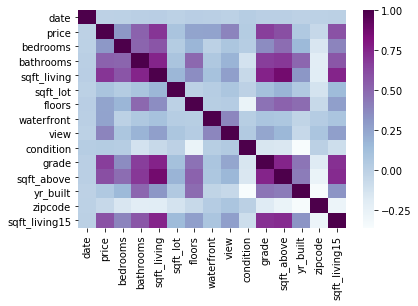

In [306]:
sns.heatmap(corr, cmap = "BuPu")


In [265]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15', 'yrs_standing'],
      dtype='object')

In [307]:
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd



X = df[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'waterfront', 'grade','view', 'zipcode', 'yrs_standing', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['price']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()

model.summary()

Intercept: 
 132527.88126794947
Coefficients: 
 [-3.96916884e+04  4.73568972e+04  1.66492928e+02 -3.19668077e-03
  1.87672467e+04  6.16066458e+05  1.20924983e+05  4.39954129e+04
 -1.16347049e+01  3.65213376e+03  2.76386068e+04 -6.12802029e+00
  2.41159202e+01 -5.59105242e-01]


/Users/Finch/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2914.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:30:11   Log-Likelihood:            -2.9593e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21582   BIC:                         5.920e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.325e+05   3.08e+06      0.043      0.966    -5.9e+06    6.16e+06
bedrooms      -3.969e+04   2038.835    -19.468      0.000   -4.37e+04   -3.57e+04
bathrooms      4.736e+04   3477.922     13.616      0.000    4.05e+04    5.42e+04
sqft_living     166.4929      4.701     35.418      0.000     157.279     175.707
sqft_lot         -0.0032      0.051     -0.062      0.950      -0.104       0.097
condition      1.877e+04   2486.701      7.547      0.000    1.39e+04    2.36e+04
waterfront     6.161e+05   1.95e+04     31.663      0.000    5.78e+05    6.54e+05
grade          1.209e+05   2262.927     53.437      0.000    1.16e+05    1.25e+05
view             4.4e+04   2265.307     19.421      0.000    3.96e+04    4.84e+04
zipcode         -11.6347     31.369     -0.371      0.711     -73.120      49.851
yrs_standing   3652.1338     70.789     51.592      0.000    3513.383    3790.885
floors         2.764e+04   3838.707      7.200      0.000    2.01e+04    3.52e+04
sqft_above       -6.1280      4.584     -1.337      0.181     -15.114       2.858
sqft_living15    24.1159      3.652      6.604      0.000      16.958      31.274
sqft_lot15       -0.5591      0.078     -7.124      0.000      -0.713      -0.405
==============================================================================
Omnibus:                    16327.644   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1181408.127
Skew:                           3.036   Prob(JB):                         0.00
Kurtosis:                      38.721   Cond. No.                     2.10e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""